# sdのエラーについて
翁さんの環境でpython main.pyして、学習しようとしたら以下のようなエラーが出た。
```
Error Opening InputStream: Invalid device [PaErrorCode -9996]
```
原因を調査する

In [2]:
import sounddevice as sd

### API

In [3]:
apis = sd.query_hostapis()
for i, api in enumerate(apis):
    print(f"[{i}] {api['name']} - Devices: {api['devices']}")


[0] MME - Devices: [0, 1, 2, 3, 4, 5, 6, 7, 8]
[1] Windows DirectSound - Devices: [9, 10, 11, 12, 13, 14, 15, 16, 17]
[2] Windows WASAPI - Devices: [18, 19, 20, 21, 22, 23, 24]
[3] Windows WDM-KS - Devices: [25, 26, 27, 28, 29, 30, 31, 32]


### デバイス

In [4]:
devices = sd.query_devices()
for i, d in enumerate(devices):
    print(f"[{i}] {d['name']} - Input Channels: {d['max_input_channels']}, HostAPI: {d['hostapi']}")

[0] Microsoft サウンド マッパー - Input - Input Channels: 2, HostAPI: 0
[1] ライン (USB AUDIO  CODEC) - Input Channels: 2, HostAPI: 0
[2] ジャックマイク (Realtek(R) Audio) - Input Channels: 2, HostAPI: 0
[3] Microsoft サウンド マッパー - Output - Input Channels: 0, HostAPI: 0
[4] スピーカー (USB AUDIO  CODEC) - Input Channels: 0, HostAPI: 0
[5] PL2493H (NVIDIA High Definition - Input Channels: 0, HostAPI: 0
[6] スピーカー (Realtek(R) Audio) - Input Channels: 0, HostAPI: 0
[7] ヘッドフォン (Realtek(R) Audio) - Input Channels: 0, HostAPI: 0
[8] PL2493H (NVIDIA High Definition - Input Channels: 0, HostAPI: 0
[9] プライマリ サウンド キャプチャ ドライバー - Input Channels: 2, HostAPI: 1
[10] ライン (USB AUDIO  CODEC) - Input Channels: 2, HostAPI: 1
[11] ジャックマイク (Realtek(R) Audio) - Input Channels: 2, HostAPI: 1
[12] プライマリ サウンド ドライバー - Input Channels: 0, HostAPI: 1
[13] スピーカー (USB AUDIO  CODEC) - Input Channels: 0, HostAPI: 1
[14] PL2493H (NVIDIA High Definition Audio) - Input Channels: 0, HostAPI: 1
[15] スピーカー (Realtek(R) Audio) - Input Channels: 0, Hos

In [5]:
# 実際の名前に合わせて変更してください
target_api_name = "WASAPI"
target_device_name = "ライン"

# API番号を取得
api_num = next((i for i, api in enumerate(apis) if target_api_name in api["name"]), None)
print("選ばれたAPI番号:", api_num)

# デバイス番号を取得
device_num = next((i for i, device in enumerate(devices)
                   if target_device_name in device["name"] and device["hostapi"] == api_num), None)
print("選ばれたデバイス番号:", device_num)


選ばれたAPI番号: 2
選ばれたデバイス番号: 24


In [10]:
import sounddevice as sd

print("=== Host APIs ===")
for i, api in enumerate(sd.query_hostapis()):
    print(f"[{i}] {api['name']}")

print("\n=== Devices ===")
for i, dev in enumerate(sd.query_devices()):
    print(f"[{i}] {dev['name']} - Input Channels: {dev['max_input_channels']} - HostAPI: {dev['hostapi']}")


=== Host APIs ===
[0] MME
[1] Windows DirectSound
[2] Windows WASAPI
[3] Windows WDM-KS

=== Devices ===
[0] Microsoft サウンド マッパー - Input - Input Channels: 2 - HostAPI: 0
[1] ライン (USB AUDIO  CODEC) - Input Channels: 2 - HostAPI: 0
[2] ジャックマイク (Realtek(R) Audio) - Input Channels: 2 - HostAPI: 0
[3] Microsoft サウンド マッパー - Output - Input Channels: 0 - HostAPI: 0
[4] スピーカー (USB AUDIO  CODEC) - Input Channels: 0 - HostAPI: 0
[5] PL2493H (NVIDIA High Definition - Input Channels: 0 - HostAPI: 0
[6] スピーカー (Realtek(R) Audio) - Input Channels: 0 - HostAPI: 0
[7] ヘッドフォン (Realtek(R) Audio) - Input Channels: 0 - HostAPI: 0
[8] PL2493H (NVIDIA High Definition - Input Channels: 0 - HostAPI: 0
[9] プライマリ サウンド キャプチャ ドライバー - Input Channels: 2 - HostAPI: 1
[10] ライン (USB AUDIO  CODEC) - Input Channels: 2 - HostAPI: 1
[11] ジャックマイク (Realtek(R) Audio) - Input Channels: 2 - HostAPI: 1
[12] プライマリ サウンド ドライバー - Input Channels: 0 - HostAPI: 1
[13] スピーカー (USB AUDIO  CODEC) - Input Channels: 0 - HostAPI: 1
[14] PL2493

In [11]:
import sounddevice as sd
import numpy as np
import matplotlib.pyplot as plt

fs = 48000        # サンプリング周波数
duration = 1       # [s]

target_api = "WASAPI"
target_device = "ライン"          # 「ライン入力」など部分一致で OK

# ------- 1. 一覧を取得 -------
apis    = sd.query_hostapis()
devices = sd.query_devices()

# ------- 2. 見やすく表示して確認 -------
for idx, d in enumerate(devices):
    api_name = apis[d['hostapi']]['name']
    print(f"{idx:2d}: {d['name']}  ({api_name})  "
          f"in={d['max_input_channels']}  out={d['max_output_channels']}")

# ------- 3. ターゲットを検索 -------
api_idx = next((i for i, a in enumerate(apis)
                if target_api.lower() in a['name'].lower()), None)
if api_idx is None:
    raise RuntimeError("指定ホスト API が見つかりません")

dev_idx = next((i for i, d in enumerate(devices)
                if target_device in d['name'] and d['hostapi'] == api_idx
                and d['max_input_channels'] > 0), None)
if dev_idx is None:
    raise RuntimeError("入力対応のデバイスが見つかりません")

print("選ばれた API 番号:", api_idx)
print("選ばれたデバイス番号:", dev_idx)


 0: Microsoft サウンド マッパー - Input  (MME)  in=2  out=0
 1: ライン (2- USB AUDIO  CODEC)  (MME)  in=2  out=0
 2: ジャックマイク (Realtek(R) Audio)  (MME)  in=2  out=0
 3: Microsoft サウンド マッパー - Output  (MME)  in=0  out=2
 4: スピーカー (2- USB AUDIO  CODEC)  (MME)  in=0  out=2
 5: PL2493H (NVIDIA High Definition  (MME)  in=0  out=2
 6: スピーカー (Realtek(R) Audio)  (MME)  in=0  out=2
 7: ヘッドフォン (Realtek(R) Audio)  (MME)  in=0  out=2
 8: PL2493H (NVIDIA High Definition  (MME)  in=0  out=2
 9: プライマリ サウンド キャプチャ ドライバー  (Windows DirectSound)  in=2  out=0
10: ライン (2- USB AUDIO  CODEC)  (Windows DirectSound)  in=2  out=0
11: ジャックマイク (Realtek(R) Audio)  (Windows DirectSound)  in=2  out=0
12: プライマリ サウンド ドライバー  (Windows DirectSound)  in=0  out=2
13: スピーカー (2- USB AUDIO  CODEC)  (Windows DirectSound)  in=0  out=2
14: PL2493H (NVIDIA High Definition Audio)  (Windows DirectSound)  in=0  out=2
15: スピーカー (Realtek(R) Audio)  (Windows DirectSound)  in=0  out=2
16: ヘッドフォン (Realtek(R) Audio)  (Windows DirectSound)  in=0  out=2


recording...
finish


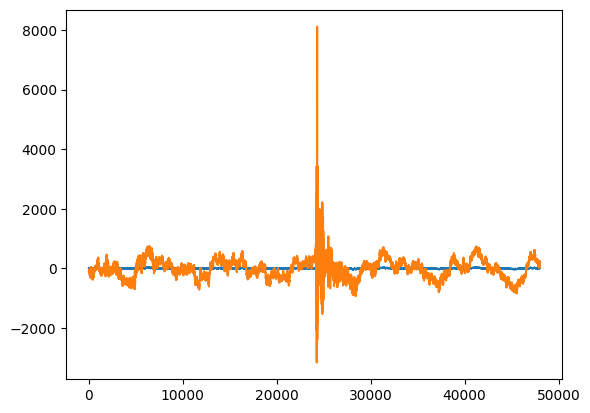

In [13]:
data = []

def callback(indata, frames, time, status):
    if status:
        print(status)
    data.append(indata.copy())

# WASAPI で排他モードが不要なら exclusive=False

with sd.InputStream(device=dev_idx,           # ← 検索で得た番号を使う
                    channels=2,               # 2ch 取れないなら 1 に
                    samplerate=fs, 
                    dtype='int16',          # 確実に対応している型
                    callback=callback):
    print('recording...')
    sd.sleep(int(duration * 1000))
    print('finish')

audio = np.concatenate(data, axis=0)          # 必要ならここで整形

plt.plot(audio)